# Convolution

This notebooks shows how convolutions works in pytorch.

A convolution involves 2 tensors: Input data and a filter.

The filter is also known as kernel.

We are going to apply a convolution to an image using the `nn.Conv2d` module of pytorch.

For simplicity, we use an image with one color channel. The image is taken from the MNIST dataset.

In [7]:
import torch
import torch.nn as nn
import torchvision
import numpy
import matplotlib.pyplot as plt

In [8]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

test_dataset = torchvision.datasets.MNIST(root='../data', train=False,
                                        download=True, transform=transform)

In [9]:
image, label = test_dataset[0] 

In [10]:
label,image.shape

(7, torch.Size([1, 28, 28]))

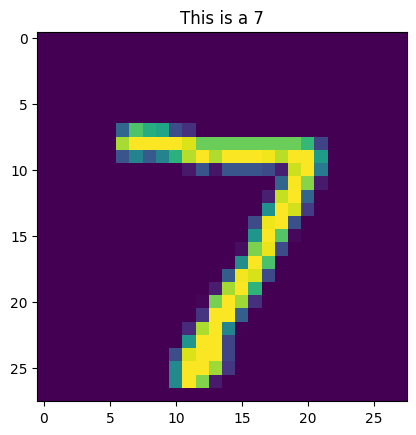

In [11]:
plt.imshow(image.squeeze())
plt.title("This is a {}".format(label))
plt.show()

In [12]:
conv1 = nn.Conv2d(in_channels=1, out_channels= 1, kernel_size=5,stride=1, padding=0)  

The convolution module contains weights that represent the filter of the convolution. The number of filters is controlled by the `out_channels` argument.

In [14]:
conv1.weight 

Parameter containing:
tensor([[[[ 0.0164, -0.0962,  0.1604, -0.1785,  0.1343],
          [-0.1136,  0.1368,  0.0161,  0.1855,  0.0340],
          [ 0.0880, -0.1245,  0.1442, -0.0818, -0.1803],
          [ 0.1312, -0.0043,  0.0808,  0.1469,  0.0265],
          [ 0.1372,  0.1346, -0.1029,  0.0556, -0.1215]]]], requires_grad=True)

In [18]:
conv1.weight.shape # [filter, color channel, height, width]

torch.Size([1, 1, 5, 5])

We can set the parameter manually to see the effect of a convolution. 

Here, the convolution averages the values in the image. 

In [19]:
conv1.weight = torch.nn.Parameter(torch.ones_like(conv1.weight)/25)

In [20]:
conv1.weight

Parameter containing:
tensor([[[[0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400]]]], requires_grad=True)

Put the image in a batch of size one to pass it to our convolutional layer.

In [21]:
batch = image.unsqueeze(0)
batch.shape

torch.Size([1, 1, 28, 28])

In [22]:
out = conv1(batch)

The shape of the output is `Height-kernel_size+1`.

In [23]:
out.shape

torch.Size([1, 1, 24, 24])

Text(0.5, 1.0, 'Output image')

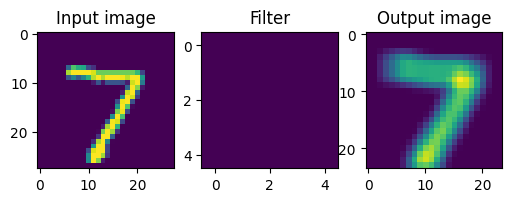

In [24]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(6,3))
ax[0].imshow(image.squeeze())
ax[0].set_title("Input image")
ax[1].imshow(conv1.weight.squeeze().detach())
ax[1].set_title("Filter")
ax[2].imshow(out.squeeze().detach())
ax[2].set_title("Output image")

In [25]:
newKernel = torch.tensor([[[[-1.0,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1]]]])
conv1.weight = torch.nn.Parameter(newKernel)
out = conv1(batch)

Text(0.5, 1.0, 'Output image')

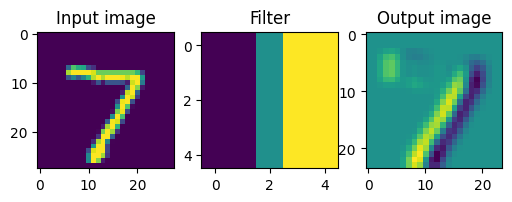

In [26]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(6,3))
ax[0].imshow(image.squeeze())
ax[0].set_title("Input image")
ax[1].imshow(conv1.weight.squeeze().detach())
ax[1].set_title("Filter")
ax[2].imshow(out.squeeze().detach())
ax[2].set_title("Output image")

In [27]:
newKernel = torch.tensor([[[[1.0,1,1,1,1],[1,1,1,1,1],[0,0,0,0,0],[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1]]]])
conv1.weight = torch.nn.Parameter(newKernel)
out = conv1(batch)

Text(0.5, 1.0, 'Output image')

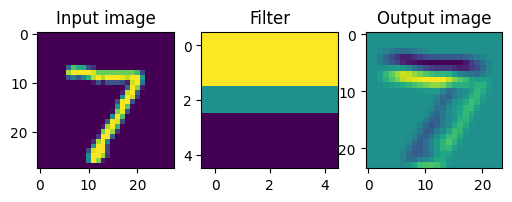

In [28]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(6,3))
ax[0].imshow(image.squeeze())
ax[0].set_title("Input image")
ax[1].imshow(conv1.weight.squeeze().detach())
ax[1].set_title("Filter")
ax[2].imshow(out.squeeze().detach())
ax[2].set_title("Output image")

## Take home messages

* Filters with different weights will extract different features in the image.
* During the convolution, the filter is applied to all part of the image. It detects the feature independently of where it is in the image.  

* In a convolutional network, the weights in the filters are learned during the training process. No need to set them manually!